# Calculation of MACD and RSI

Suppose that we have our chart using Random Stock Generator.

In [17]:
import math
import numpy
import random
import decimal
import scipy.linalg
import matplotlib
import numpy.random as nrand
import matplotlib.pyplot as plt
InitialPrice = 1000
RandomInc = numpy.empty(15000)
RandomPrice = numpy.empty(15000)
RandomPrice[0] = InitialPrice
    
for i in range(15000):
    suddenjump = random.uniform(0,1)
    if suddenjump < 0.1:
        RandomInc[i] = random.uniform(-0.05,0.05)
    else:
        RandomInc[i] = random.uniform(-0.01,0.01)
            
    if i!=14999:
        if RandomPrice[i]+RandomPrice[i]*RandomInc[i] > 50:
            RandomPrice[i+1] = RandomPrice[i]+RandomPrice[i]*RandomInc[i]
        else:   
            RandomPrice[i+1] = RandomPrice[i]-RandomPrice[i]*RandomInc[i]

Since it is easier to data analysis on pandas, we'll switch from numpy to pandas.

In [18]:
import pandas
from pandas import DataFrame

df = DataFrame(RandomPrice,columns=['Prices'])
df['Perc'] = RandomInc

For now, our decision mechanism will only consist of two parameters MACD and RSI.

First we'll compute the MACD for our chart and enter the values to our dataframe.

In [19]:
exp1 = df['Prices'].ewm(span=12, adjust=False).mean()
exp2 = df['Prices'].ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
df['MACD']=macd
df['Signal Line']=exp3
df['MACD'][0:17]=0
df['Signal Line'][0:26]=0

Then we'll compute the RSI and enter the values to our dataframe.

In [20]:
delta = df['Prices'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
    
df['RSI'] = 100 - (100/(1+rs))
df['RSI'][0:14]=0

Let's plot our stock graph with the MACD and RSI values.

Text(0, 0.5, 'RSI')

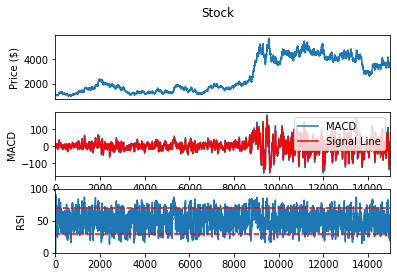

In [21]:
fig, (ax1, ax2 , ax3) = plt.subplots(3)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Stock')
    
df['Prices'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
    
macd.plot(ax=ax2,label= 'MACD')
exp3.plot(ax=ax2,label='Signal Line', color='r')
ax2.set_ylabel('MACD')
ax2.legend(["MACD","Signal Line"])
    
df['RSI'].plot(ax=ax3)
ax3.set_ylim(0,100)
ax3.axhline(30, color='r', linestyle='--')
ax3.axhline(70, color='r', linestyle='--')
ax3.set_ylabel("RSI")

Since this graph is way too complicated, let's plot a part of our chart for example between minutes 500 and 550.

Text(0, 0.5, 'RSI')

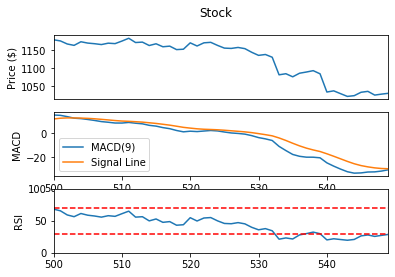

In [22]:
fig, (ax1, ax2 , ax3) = plt.subplots(3)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Stock')
    
df['Prices'].iloc[500:550].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
    
    
df['MACD'].iloc[500:550].plot(ax=ax2,legend='MACD')
df['Signal Line'].iloc[500:550].plot(ax=ax2,legend='Signal Line')
ax2.set_ylabel('MACD')
ax2.legend(["MACD(9)","Signal Line"])
    
df['RSI'].iloc[500:550].plot(ax=ax3)
ax3.set_ylim(0,100)
ax3.axhline(30, color='r', linestyle='--')
ax3.axhline(70, color='r', linestyle='--')
ax3.set_ylabel('RSI')